##### The simplex algorithms is the widely used method in the field of linear programming. 
##### It operates on the canonical form 
##### Maximize: $ \mathbf{c^T x}$

###### Subject to : $A\mathbf{x} \leq \mathbf{b}$ and $\mathbf{x}\geq 0$


##### Where $\mathbf{c}=(c_{1}, c_{2}...) $are the coefficients of the objective function,  $\mathbf{x}=(x_{1}, x_{2}...) $ are the variables of the problems, A is a pxn matrix of the coefficients and $\mathbf{b}= (b_{1},b_{2}...) $ are non-negative constraints 



### Example of simplex programming using SCIPY

##### Minimize: 

$ f = -1*x_{0} + 4*x_{1}$

##### Subject to:

$-3*x_{0} + 1*x_{1} <= 6$

$1*x_{0} + 2*x_{1} <= 4$

$x_{1} >= -3$

In [ ]:
!pip install scipy


In [9]:
from scipy.optimize import linprog
c = [-1, 4] # list of coefficients that is need to be maximize/minimize
A = [[-3, 1], [1, 2]] # list of coefficients for the constraints. 
b = [6, 4]
x0_bnds = (None, None) # defining the bounds in the form of tuples 
x1_bnds = (-3, None)
res = linprog(c, A, b, bounds=(x0_bnds, x1_bnds), method ="simplex")
#res = linprog(c, A, b, bounds=(x0_bnds, x1_bnds), method ="interior-point") # can be changed to "revised simplex", "interior-point" method
print(res)


     fun: -22.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([39.,  0.])
  status: 0
 success: True
       x: array([10., -3.])


##### The scipy.optimize.linprog returns 
##### 1. optimal value of the objective function if exist ' fun'.
##### 2. Number of iterations required to find the solution 'nit'.
##### 3. The independent variable vector which optimizes the linear programming problem 'x : ndarray'
##### 4. status :  Returns True if the algorithm succeeded in finding an optimal solution.
        0 : Optimization terminated successfully
        1 : Iteration limit reached
        2 : Problem appears to be infeasible
        3 : Problem appears to be unbounded
        4 : Serious numerical difficulties encountered

###  Example of simplex using pulp
#### if you have anaconda then go for the following command 
    conda install -c conda-forge glpk
#### Refer  to this <a href ="https://stackoverflow.com/questions/17513666/installing-glpk-gnu-linear-programming-kit-on-windows" >link</a> for the installation of glpk in windows. 


#### If installation is not possible you can work with pulp that comes up with an interface for glpk 




**Maximize :**  $Z = 500x + 450y$

**St:** 

$x + 5/6 y <=10$

$x +2y <= 15$

$x <= 8$

$x, y >= 0$


Problem:
MAXIMIZE
500*x + 450*y + 0
SUBJECT TO
_C1: x + 0.833333333333 y <= 10

_C2: x + 2 y <= 15

_C3: x <= 8

VARIABLES
x Continuous
y Continuous

Optimal
6.42857 4.28571 5142.8544999999995


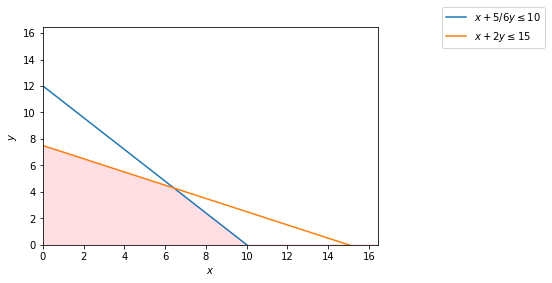

In [11]:
# By default GLPK use simplex programming to solve the problem
# To call the method simplex we will use glpk solver 

import pulp as p
import matplotlib.pyplot as plt #it is used for creating scatter line bars, charts, figure, scatter plots etc.
import numpy as np # a whole-some package for performing basic scientific operations 



Lp_prob = p.LpProblem('Problem', p.LpMaximize)  

# Create problem Variables  
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0 

# Objective Function 
Lp_prob += 500 * x + 450 * y    

# Constraints: 
Lp_prob += x + 5/6 * y <= 10
Lp_prob += x + 2*y <= 15
Lp_prob += x <= 8

# Display the problem 
print(Lp_prob) 
solver= p.GLPK_CMD(path=None, keepFiles=0, mip=1, msg=0)
status = Lp_prob.solve(solver)   # Solver GLPK
#status = Lp_prob.solve()   # Solver CBC
print(p.LpStatus[status])   # The solution status 

# Printing the final solution 
print(p.value(x), p.value(y), p.value(Lp_prob.objective)) 

### for graphical represenation 
z = np.linspace(0, 600, 10000)
#Constraints
y1 = (10- z)/(5/6)
y2 = (15-z)/2
# Make plot
plt.plot(z, y1, label=r'$x+5/6y\leq10$')
plt.plot(z, y2, label=r'$x+2y\leq15$')
plt.xlim((0, p.value(x)+ 10))
plt.ylim((0, p.value(x)+ 10))
#Labelling X and Y axis
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y1)
plt.fill_between(z, y5, color='pink',alpha=0.5)
plt.legend(bbox_to_anchor=(1.5, 1), loc=5, borderaxespad=0.)
plt.show()



### Example using CVXOPT
\begin{array}[t]
\mbox{minimize}   & -4x_1 - 5x_2 \\
\mbox{subject to} &  2x_1 + x_2 \leq 3 \\
                  & x_1 + 2x_2 \leq 3 \\
                  & x_1 \geq 0, \quad x_2 \geq 0.
\end{array}

In [96]:

from cvxopt import matrix, solvers
c = matrix([-4., -5.])
G = matrix([[2., 1., -1., 0.], [1., 2., 0., -1.]])
h = matrix([3., 3., 0., 0.])
sol = solvers.lp(c, G, h,solver ='glpk')
print(sol['x'])
print(sol)


[ 1.00e+00]
[ 1.00e+00]

{'status': 'optimal', 'x': <2x1 matrix, tc='d'>, 's': <4x1 matrix, tc='d'>, 'y': <0x1 matrix, tc='d'>, 'z': <4x1 matrix, tc='d'>, 'primal objective': -9.0, 'dual objective': -9.0, 'gap': 0.0, 'relative gap': 0.0, 'primal infeasibility': 0.0, 'dual infeasibility': 0.0, 'primal slack': 0.0, 'dual slack': -0.0, 'residual as primal infeasibility certificate': None, 'residual as dual infeasibility certificate': None}
